## 1. Meet Professor William Sharpe
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>
<p>Enter William Sharpe. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.</p>
<p>The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the capital asset pricing model (CAPM).</p>
<p>The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the <a href="https://fred.stlouisfed.org/series/TB3MS">3-month Treasury Bill Rate</a>. </p>
<p>So let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Facebook and Amazon. As benchmark we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.</p>

In [26]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

## 2. Import datasets
<p> Import data from csv and drop NaN values </p>
<p> In this project, we evaluate 2 stocks, Amazon (NASDAQ:AMZN) and Facebook (NASDAQ:FB). For the benchmark, we'll use S&amp;P 500 Index instead of Risk Free Rate. </p>

In [3]:
# stock_data consist of Amazon & Facebook closing price from 2016-01-04 to 2016-12-30
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates= ['Date'], index_col = ['Date']).dropna()

# benchmark_data consist of S&P500 Index closing price from 2016-01-04 to 2016-12-30.
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

## 3. Plot & summarize daily prices for Amazon and Facebook
<p>Before comparing the stock to the index, visualize the stock data to understand about the stock price data </p>

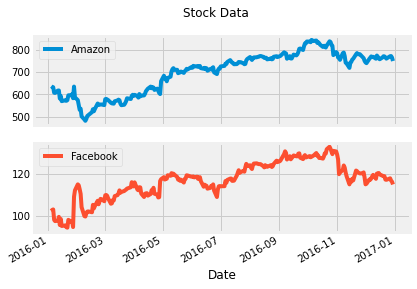

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


In [51]:
# visualize the stock_data
stock_data.plot(subplots = True, title = 'Stock Data')
plt.show()

# summarize the stock_data
stock_data.describe()

## 4. Visualize & summarize daily values for the S&P 500
<p>Let's also take a closer look at the value of the benchmark, S&amp;P 500.</p>

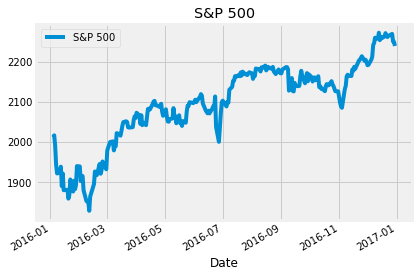

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [7]:
# visualize the benchmark_data
benchmark_data.plot(title = 'S&P 500')
plt.show()

# summarize the benchmark_data
benchmark_data.describe()

## 5. Daily Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.</p>
<p>However, the data show the historical value of each investment, not the return. </p>
<p>To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio.</p>

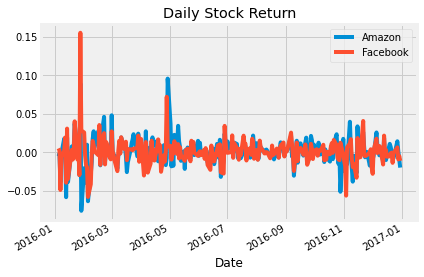

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [9]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# visualize the daily returns
stock_returns.plot(title = 'Daily Stock Return')
plt.show()

# summarize the daily returns
stock_returns.describe()

## 6. Daily S&P 500 returns
<p>For the S&amp;P 500, calculating daily returns works just the same way </p>

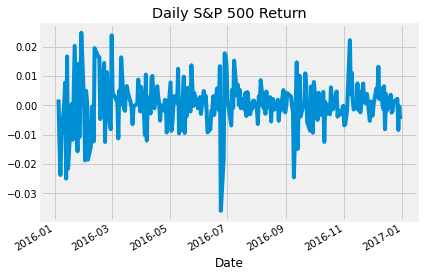

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

In [11]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# visualize the daily returns
sp_returns.plot(title = 'Daily S&P 500 Return')
plt.show()

# summarize the daily returns
sp_returns.describe()

## 7. Excess Return of Stocks from S&P500 Index
<p> Next, calculate the relative performance of stocks vs. the S&amp;P 500 benchmark</p>

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


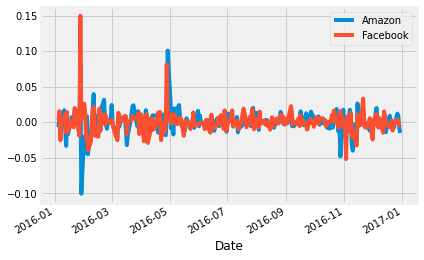

In [40]:
# calculate the difference in daily returns
excess_returns = stock_returns.subtract(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()


## 8. The Sharpe Ratio 
<p> Sharpe Ratio is equal to relative performance of portfolio to the benchmark (<code>avg_excess_return</code>) divided by standard deviation of portfolio excess return (<code>sd_excess_return</code>) </p>

##### Step 1: The Average Difference in Daily Returns Stocks vs S&amp;P 500
<p>Now we can finally start computing the Sharpe Ratio. </p> 
<p> First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the S&amp;P500 Index.</p>

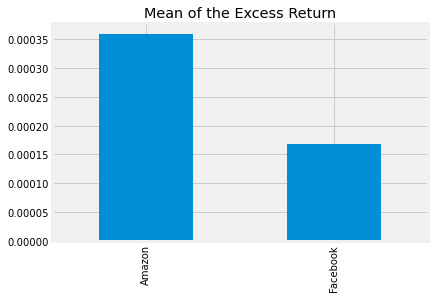

In [52]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return

# plot avg_excess_returns
avg_excess_return.plot(kind='bar',title = 'Mean of the Excess Return')
plt.show()

#### Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

In [24]:
# calculate the excess_returns standard deviations
sd_excess_return = excess_returns.std()

# print the stocks standar deviation
sd_excess_return

Amazon      0.016126
Facebook    0.015439
dtype: float64

#### Step 3: Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

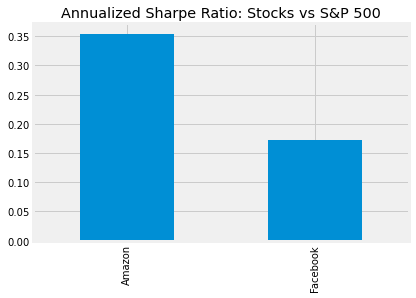

In [27]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return/sd_excess_return

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# visualize the annualized sharpe ratio
annual_sharpe_ratio.plot(kind='bar', title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

## 9. Daily Cummulative Return for Investment
<p> If we invest $1 on the first trading day of 2016, the return that we got on the last trading day is different for every stock and benchmark. </p>

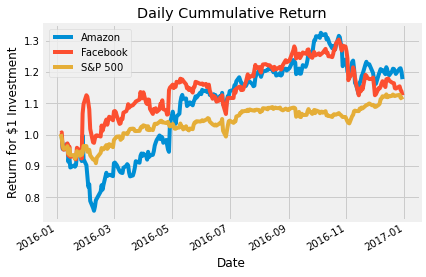

In [53]:
stock_cum_return = (stock_returns +1).cumprod()
benchmark_cum_return = (sp_returns +1).cumprod()
stock_cum_return.plot()
benchmark_cum_return.plot()
plt.legend()
plt.title('Daily Cummulative Return')
plt.xlabel('Date')
plt.ylabel('Return for $1 Investment')
plt.show()

## 10. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher, but the Sharpe Ratio is almost twice than Facebook. Also, if we see the Daily Cummulative Return Chart, the return for 1$ investment in Amazon is higher than the others. According to the Sharpe Ratio, the best decision that we can make is to invest in Amazon</p>